In this notebook I hope to explore a dataset on powerlifters. I myself have done a couple powerlifting competitions before and I'm big into lifting in general, so I think it'd be interesting to play around with this data set and maybe see how I'd stack up against the greatest!

The data used in this kernel can be accessed at https://www.kaggle.com/open-powerlifting/powerlifting-database

# Standard Imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Loading Data...

In [3]:
lifters = pd.read_csv('powerlifters.csv')

# Get Insight On Data/Clean Up

In [4]:
print(lifters.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386414 entries, 0 to 386413
Data columns (total 17 columns):
MeetID            386414 non-null int64
Name              386414 non-null object
Sex               386414 non-null object
Equipment         386414 non-null object
Age               147147 non-null float64
Division          370571 non-null object
BodyweightKg      384012 non-null float64
WeightClassKg     382602 non-null object
Squat4Kg          1243 non-null float64
BestSquatKg       298071 non-null float64
Bench4Kg          1962 non-null float64
BestBenchKg       356364 non-null float64
Deadlift4Kg       2800 non-null float64
BestDeadliftKg    317847 non-null float64
TotalKg           363237 non-null float64
Place             385322 non-null object
Wilks             362194 non-null float64
dtypes: float64(10), int64(1), object(6)
memory usage: 50.1+ MB
None


Wow that's a lot of information! One thing I notice right away is the weight is in Kg. While I get that metric is superior, I'm an American and when I go to the gym I lift with pounds, so the first order of business should be to make some new columns in pounds.

Another thing I notice is that there are not many data points of Squat4kg, Bench4kg, and Deadlift4kg. Let's get rid of those too.

In [5]:
del lifters['Squat4Kg']
del lifters['Bench4Kg']
del lifters['Deadlift4Kg']


lifters['BodyweightLb'] = round((lifters['BodyweightKg'] * 2.20462), 2)
lifters['BestSquatLb'] = round((lifters['BestSquatKg'] * 2.20462), 2)
lifters['BestBenchLb'] = round((lifters['BestBenchKg'] * 2.20462), 2)
lifters['BestDeadliftLb'] = round((lifters['BestDeadliftKg'] * 2.20462), 2)
lifters['TotalLb'] = round((lifters['TotalKg'] * 2.20462), 2) 

The following code is all commented out because I did it when first running the kernel, but since restarting the kernel it no longer needs to be done. I am keeping it here to demonstrate what was needed.

In [6]:
# Some Weight Classes have a + sign in it, meaning it is that weight or more (no maximum)
# e.g. 90+ (Weight class for 90kg or more people)
# This means the column will need some extra detail to convert to pounds.

#First, a new column which will say whether the weight class they're in has a maximum

#lifters['HasMaxWeight'] = False if '+' in lifters['WeightClassKg'] else True

#Next, remove that pesky + sign

#lifters['WeightClassKg'] = lifters['WeightClassKg'].str.replace('+','')

#Almost there...now we need to convert the strings left to floats

#lifters['WeightClassKg'] = lifters['WeightClassKg'].astype('float')

#Finally, convert the Kg to Lbs!

#lifters['WeightClassLb'] = round((lifters['WeightClassKg'] * 2.20462), 2)

Now let's take a sample of our first 5 competitor entries

In [7]:
print(lifters.head(5))

   MeetID              Name Sex   Equipment   Age     Division  BodyweightKg  \
0       0  Angie Belk Terry   F       Wraps  47.0    Mst 45-49         59.60   
1       0       Dawn Bogart   F  Single-ply  42.0    Mst 40-44         58.51   
2       0       Dawn Bogart   F  Single-ply  42.0  Open Senior         58.51   
3       0       Dawn Bogart   F         Raw  42.0  Open Senior         58.51   
4       0      Destiny Dula   F         Raw  18.0   Teen 18-19         63.68   

  WeightClassKg  BestSquatKg  BestBenchKg  BestDeadliftKg  TotalKg Place  \
0            60        47.63        20.41           70.31   138.35     1   
1            60       142.88        95.25          163.29   401.42     1   
2            60       142.88        95.25          163.29   401.42     1   
3            60          NaN        95.25             NaN    95.25     1   
4          67.5          NaN        31.75           90.72   122.47     1   

    Wilks  BodyweightLb  BestSquatLb  BestBenchLb  BestDeadlif

Those are some powerful women! Unfortunately though some of these entries will have to go. NaN is not a real weight!

In [8]:
#Axis 0 are rows, how='any' means if there is a single NaN value, delete the row
lifters = lifters.dropna(axis=0, how='any')

print(lifters.head(5))

   MeetID              Name Sex   Equipment   Age     Division  BodyweightKg  \
0       0  Angie Belk Terry   F       Wraps  47.0    Mst 45-49         59.60   
1       0       Dawn Bogart   F  Single-ply  42.0    Mst 40-44         58.51   
2       0       Dawn Bogart   F  Single-ply  42.0  Open Senior         58.51   
5       0   Courtney Norris   F       Wraps  28.0  Open Senior         62.41   
6       0     Maureen Clary   F         Raw  60.0    Mst 60-64         67.31   

  WeightClassKg  BestSquatKg  BestBenchKg  BestDeadliftKg  TotalKg Place  \
0            60        47.63        20.41           70.31   138.35     1   
1            60       142.88        95.25          163.29   401.42     1   
2            60       142.88        95.25          163.29   401.42     1   
5          67.5       170.10        77.11          145.15   392.36     1   
6          67.5       124.74        95.25          163.29   383.28     1   

    Wilks  BodyweightLb  BestSquatLb  BestBenchLb  BestDeadlif

Now we're ready for some cool graphs and stuff!

# Visualization

In powerlifting, you can get your "total" by adding the 3 main lifts (bench+squat+deadlift). At the time of writing this, I weigh 185 lbs (83.9 kg) and my powerlifting total is 1,035 lbs (469.4 kg). Let's see how I stack up!

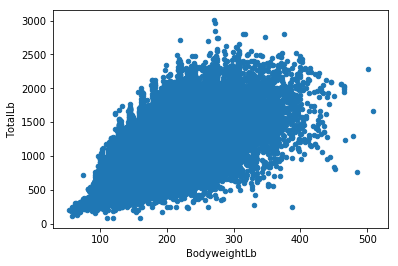

In [9]:
lifters.plot.scatter(x='BodyweightLb', y='TotalLb')

Not too bad! It looks like a 1,035 pound total at 185 pounds bodyweight is right in the middle of the range of totals at my weight. Another thing you can see from this scatter plot is that bodyweight and total weight lifted are correlated (though eventually you get diminishing returns).

Speaking of correlations...let's map out all of our categories and look for more!

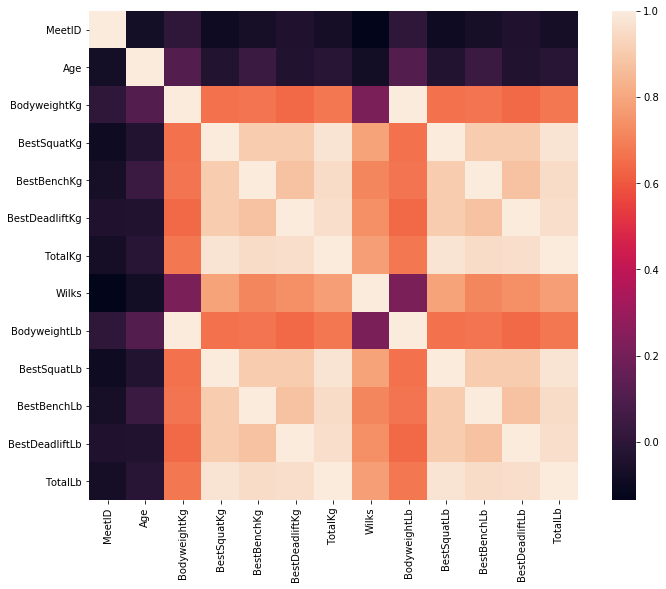

In [11]:
import seaborn as sns

correlations = lifters.corr()

f, ax = plt.subplots(figsize=(12,9))
sns.heatmap(correlations, vmax=1, square=True);

First off we see that some things are completely correlated with itself (duh). Secondly, there is a correlation between Lifts in Kg and Lb, which makes sense since a change in one leads to a change in another!

Getting those two things out of the way, we can see some more interesting things...

Age doesn't seem to affect any of the lifts! This was surprising to me, since I thought that being younger (20-30) would mean more weight lifted, but the heatmap here says otherwise!

You'll see that 'Wilks" correlates to the lifts and total, which is to be expected. Wilks is a scoring system which takes into account your weight liftet, bodyweight, and sex.